Initialization

In [15]:
using LinearAlgebra
using Plots

include("lsq_classifier_data.jl");

In [16]:
beta = X'\y;

In [17]:
y_hat = X' * beta
y_test_hat = X_test' * beta;

In [18]:
function compute_loss(y_hat,y)
    match = 0
    for i in 1:size(y_hat)[1]
        if sign.(y_hat[i]) != y[i]
            match+=1
        end
    end
    return match/size(y_hat)[1]
end

compute_loss (generic function with 1 method)

In [19]:
loss_train = compute_loss(y_hat,y)

0.31

In [20]:
loss_test = compute_loss(y_test_hat,y_test)

0.37

In [21]:
lambda = 10 .^ range(-1, 4, length=100);

In [22]:
test_out = []
train_out = []

Any[]

In [23]:
for i in lambda
    beta = inv(X*(X') + i*Matrix{Float64}(I,50,50)) * X * y
    append!(test_out,compute_loss((X_test')*beta, y_test))
    append!(train_out,compute_loss((X')*beta, y))
end

In [24]:
lambda[findmin(test_out)[2]]

170.73526474706904

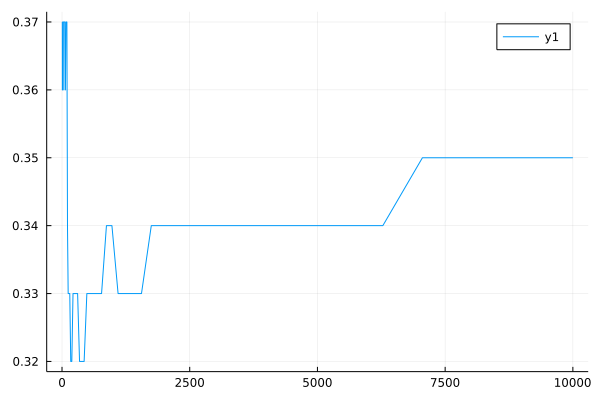

In [25]:
plot(lambda,test_out)

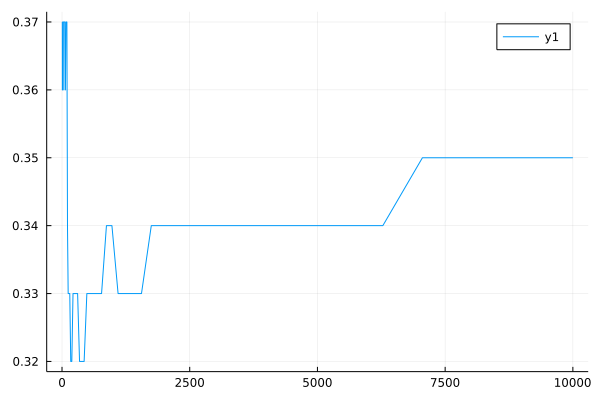

In [26]:
plot(lambda,test_out)